# EDA of visualization and training a model by given attributes

In [2]:
#pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [5]:
import warnings
warnings.filterwarnings("ignore") 

In [6]:
#Load given dataset
data = p.read_csv('drug.csv')
df=data.dropna()

In [7]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,condition,review,rating,date,usefulCount,drugName
0,0,148873,149718,73450,Birth Control,"""I loved this pill at first, it got rid if my ...",4,"November 28, 2013",22,Ethinyl estradiol / norethindrone
1,1,142496,143318,73600,Birth Control,"""I started taking the pill a little over a mon...",5,"May 28, 2013",6,Ethinyl estradiol / norethindrone
2,2,102598,103191,72720,Birth Control,"""This is the first pill that I&#039;ve tried w...",7,"August 28, 2015",2,Ethinyl estradiol / norethindrone
3,3,559,562,72638,Birth Control,"""I&#039;ve been on Junel Fe for 9 months now. ...",3,"September 22, 2015",5,Ethinyl estradiol / norethindrone
4,4,73183,73619,16494,Birth Control,"""This pill overall is not good. its been about...",2,"December 25, 2015",15,Ethinyl estradiol / norethindrone
5,5,20392,20516,73221,Birth Control,"""Well the first 2 months on Microgestin Fe 1/2...",7,"September 2, 2014",4,Ethinyl estradiol / norethindrone
6,6,94025,94579,73435,Birth Control,"""I take this birth control mainly for cramps, ...",8,"October 29, 2013",5,Ethinyl estradiol / norethindrone
7,7,140268,141075,74585,Abnormal Uterine Bleeding,"""I have been on this pill for 2 weeks. I took ...",1,"July 17, 2009",29,Levonorgestrel
8,8,141511,142330,72659,Birth Control,"""I was never able to take &quot;the pill&quot;...",10,"September 11, 2015",12,Ethinyl estradiol / norethindrone
9,9,68317,68730,16079,Birth Control,"""I stopped and restarted this BC to see if may...",3,"May 25, 2016",5,Ethinyl estradiol / norethindrone


In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'condition', 'review', 'rating', 'date', 'usefulCount', 'drugName'],
      dtype='object')

Spliting Train/Test:

In [11]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='drugName', axis=1)
#Response variable
y = df.loc[:,'drugName']  

In [12]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  12712
Number of test dataset:  5448
Total number of dataset:  18160


Ethinyl estradiol / norethindrone    3632
Levonorgestrel                       3632
Ethinyl estradiol / norgestimate     3632
Etonogestrel                         3632
Nexplanon                            3632
Name: drugName, dtype: int64


Text(0.5, 1.0, 'Distribution of mediction ')

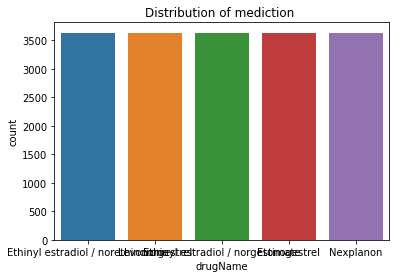

In [14]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "drugName", data = df)
print(df.loc[:, 'drugName'].value_counts())
plt.title('Distribution of mediction ')

In [11]:
df['drugName'].unique()

array(['Ethinyl estradiol / norethindrone',
       'Ethinyl estradiol / norgestimate', 'Etonogestrel',
       'Levonorgestrel', 'Nexplanon'], dtype=object)

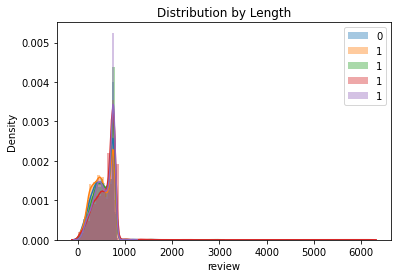

In [18]:
# plotting graph by length.
truthful =df[df['drugName'] == 'Ethinyl estradiol / norethindrone']['review'].str.len()
sns.distplot(truthful, label='0')
plt.show()
deceptive = df[df['drugName'] == 'Ethinyl estradiol / norgestimate']['review'].str.len()
sns.distplot(deceptive, label='1')
deceptive = df[df['drugName'] == 'Etonogestrel']['review'].str.len()
sns.distplot(deceptive, label='1')
deceptive = df[df['drugName'] == 'Levonorgestrel']['review'].str.len()
sns.distplot(deceptive, label='1')
deceptive = df[df['drugName'] == 'Nexplanon']['review'].str.len()
sns.distplot(deceptive, label='1')
plt.title('Distribution by Length')
plt.legend()

Training model:

In [19]:
# !pip install nltk

  Using cached click-8.0.3-py3-none-any.whl (97 kB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['review']=df['review'].str.strip()
# lowercase the text
df['review'] = df['review'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['review']=df['review'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['review'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [24]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'review':],df['drugName'],test_size=0.2)

In [25]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in X['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1

In [26]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


In [27]:
df['drugName'].unique()

array(['Ethinyl estradiol / norethindrone', 'Levonorgestrel',
       'Ethinyl estradiol / norgestimate', 'Etonogestrel', 'Nexplanon'],
      dtype=object)

(-0.5, 799.5, 799.5, -0.5)

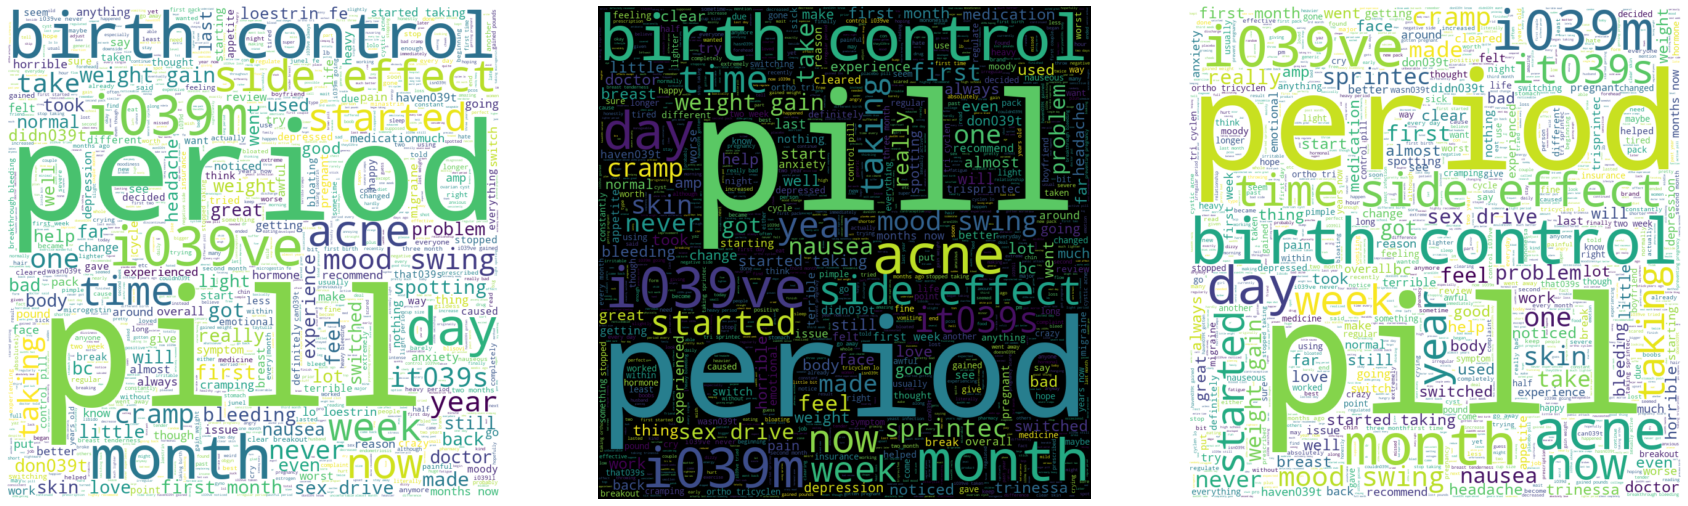

In [28]:
from wordcloud import WordCloud

Ethinyl_estradiol_norethindrone=' '.join(X.loc[y=='Ethinyl estradiol / norethindrone','review'].values)
Ethinyl_estradiol_norethindrone_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(Ethinyl_estradiol_norethindrone)

Ethinyl_estradiol_norgestimate=' '.join(X.loc[y=='Ethinyl estradiol / norgestimate','review'].values)
Ethinyl_estradiol_norgestimate_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(Ethinyl_estradiol_norgestimate)

Etonogestrel=' '.join(X.loc[y=='Ethinyl estradiol / norgestimate','review'].values)
Etonogestrel_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(Etonogestrel)

Levonorgestrel=' '.join(X.loc[y=='Levonorgestrel','review'].values)
Levonorgestrel_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(Levonorgestrel)

Nexplanon=' '.join(X.loc[y=='Nexplanon','review'].values)
Nexplanon_text = WordCloud(background_color='m',max_words=2000,width = 800, height = 800).generate(Nexplanon)



plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(Ethinyl_estradiol_norethindrone_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Ethinyl_estradiol_norgestimate_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

plt.subplot(1,3,3)
plt.imshow(Etonogestrel_text,interpolation='bilinear')
plt.title('')
plt.axis('off')




(-0.5, 799.5, 799.5, -0.5)

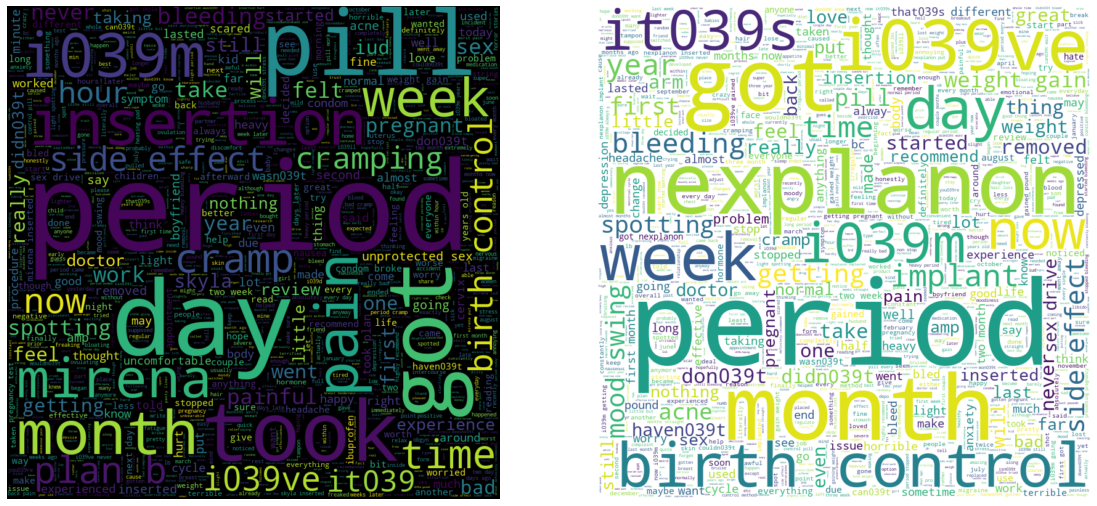

In [29]:
Levonorgestrel=' '.join(X.loc[y=='Levonorgestrel','review'].values)
Levonorgestrel_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(Levonorgestrel)

Nexplanon=' '.join(X.loc[y=='Nexplanon','review'].values)
Nexplanon_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(Nexplanon)

plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(Levonorgestrel_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

plt.subplot(1,3,2)
plt.imshow(Nexplanon_text,interpolation='bilinear')
plt.title('')
plt.axis('off')


